# Atividade Prática II - Treinamento e Validação de Modelos de RL

**Aluno:** João Paulo Poffo

**Disciplina:** Reinforcement Learning - Turma II

**Data:** 21/08/2021



Neste trabalho vamos aplicar `Gym`, `Stable-Baselines3` e `RL Baselines Zoo` para lidar com o treinamento e validação de problemas de aprendizado por reforço. Sua tarefa é:

1. Selecionar um cenário da biblioteca `Gym` de sua preferência, desde que este cenário também seja contemplado pelos modelos disponibilizados na `rl baselines zoo`;
1. Selecionar três algoritmos das biblioteca `Stable-baselines3` para resolver esse problema. Pesquise na documentação da biblioteca quais são os algoritmos mais adequados para o ambiente escolhido e justifique a sua escolha. 
1. Realize o treinamento de cada um dos três modelos ---você pode ajustar os parâmetros do modelos, se achar necessário--- e salve os modelos em disco.
1. De posse dos modelos treinados e salvos, carregue-os e avalie-os por 10 episódios. Apresente os resultados médios e gere a curva de recompensa acumulada disponibilizada pelo `TensorBoard`.
1. Compare os resultados dos modelos treinados com os resultados obtidos por modelo(s) existentes no `RL Baselines Zoo` para o cenário escolhido.
1. Gere um vídeo do melhor modelo que você treinou e do modelo escolhido na `RL Baselines Zoo`. Verifique a documentação de cada biblioteca sobre a criação do vídeo e visualização em Notebooks.



* **Data de entrega:** 04/09/2021
* **Local de envio:** AVA.
* **Tipo de documento:** Notebook (`.ipynb`).



## Preparação do ambiente

In [2]:
# Precisa instalar o swig pra windows pra funcionar o box2d-py (necessário para o atari - http://swig.org/Doc4.0/Windows.html#Windows)
# Obs: Não adianta copiar o exe para o bin. Tem que adicionar a pasta do swig no path
!pip install cmake

!pip install gym[all]

!pip install atari-py

!pip install matplotlib

  Using cached atari_py-0.2.6-cp37-cp37m-win_amd64.whl (1.8 MB)
  Using cached mujoco-py-1.50.1.68.tar.gz (120 kB)


Reason for being yanked: re-release with new wheels
  ERROR: Command errored out with exit status 1:
   command: 'E:\temp\rl_exe1\venv\Scripts\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\joao.poffo\\AppData\\Local\\Temp\\pip-install-yeylubu5\\mujoco-py_140ebdafec404e5889ab1373f3f65b5c\\setup.py'"'"'; __file__='"'"'C:\\Users\\joao.poffo\\AppData\\Local\\Temp\\pip-install-yeylubu5\\mujoco-py_140ebdafec404e5889ab1373f3f65b5c\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\joao.poffo\AppData\Local\Temp\pip-wheel-zeqi7wmh'
       cwd: C:\Users\joao.poffo\AppData\Local\Temp\pip-install-yeylubu5\mujoco-py_140ebdafec404e5889ab1373f3f65b5c\
  Complete output (54 lines):
  running bdist_wheel
  running 

  Running setup.py clean for mujoco-py
Failed to build mujoco-py
    Running setup.py install for mujoco-py: started
    Running setup.py install for mujoco-py: finished with status 'error'


      https://www.roboti.us/index.html
  
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\joao.poffo\AppData\Local\Temp\pip-install-yeylubu5\mujoco-py_140ebdafec404e5889ab1373f3f65b5c\setup.py", line 44, in <module>
      tests_require=read_requirements_file('requirements.dev.txt'),
    File "E:\temp\rl_exe1\venv\lib\site-packages\setuptools\__init__.py", line 153, in setup
      return distutils.core.setup(**attrs)
    File "e:\apps\python37\lib\distutils\core.py", line 148, in setup
      dist.run_commands()
    File "e:\apps\python37\lib\distutils\dist.py", line 966, in run_commands
      self.run_command(cmd)
    File "e:\apps\python37\lib\distutils\dist.py", line 985, in run_command
      cmd_obj.run()
    File "E:\temp\rl_exe1\venv\lib\site-packages\wheel\bdist_wheel.py", line 299, in run
      self.run_command('build')
    File "e:\apps\python37\lib\distutils\cmd.py", line 313, in run_command
      self.distribution.run_command(co

### Baixando os Roms do Atari para teste

In [3]:
#Instala o pacote para fazer downloads em Python
!pip install wget
import wget
import os

# Só baixa a primeira vez (Se baixar, tem que descompactar)
if not os.path.isdir('Roms'):

  #função auxiliar p/ apresentar a barra de progresso de download
  def bar_progress(current, total, width=80):
    progress_message = 'Baixando: %d%% (%d / %d) bytes' % (current / total * 100, current, total)
    print(progress_message, end='\r')

  #baixa o arquivo com as ROMS a partir da url
  wget.download('http://www.atarimania.com/roms/Roms.rar', out='Roms.rar', bar=bar_progress)

  #wget.download('https://github.com/openai/atari-py/archive/refs/heads/master.zip', out='atari-py.zip', bar=bar_progress)

### Importa as Roms

In [4]:
!python -m atari_py.import_roms 'Roms/ROMS/'

### Testando o ambiente com o cenário selecionado (SpaceInvaders)

In [44]:
# Função para salvar a animação como gif (daqui: https://www.tensorflow.org/tutorials/reinforcement_learning/actor_critic)
# Adaptado pra escrever o episódio e tipo de gif na base.

from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Image as ImageD

def save_frames_as_gif(frames, path='./', filename='gym_animation', label='sample', auto_output=True):
    images = []

    font = ImageFont.truetype('arial')

    for index, frame in enumerate(frames):
        image = Image.fromarray(frame)
        title = f'{label}-{index}'
        draw = ImageDraw.Draw(image)
        width, height = image.size
        text_w, text_h = draw.textsize(title, font)
        draw.text((1, height-text_h-1),title,(255,255,255),font=font)
        images.append(image)

    # loop=0: loop forever, duration=1: play each frame for 1ms (.png pro ImadeD funcionar)
    fname = f'{path}{filename}-{label}.gif' 
    images[0].save(
        fname, save_all=True, append_images=images[1:], loop=0, duration=1)

    if auto_output:
        with open(fname, 'rb') as f:
            display(ImageD(f.read(), format='gif'))


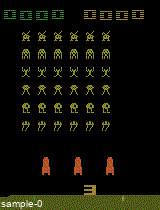

In [47]:
#importa a biblioteca gym
import gym

scenario = 'SpaceInvaders-v4'
env = gym.make(scenario)
frames = []

observation = env.reset()
#define a quantidade de passos de tempo
for _ in range(1000):
  #desenha a visualização do ambiente  
  #env.render()
  rgb_observation = env.render(mode = 'rgb_array') 
  frames.append(rgb_observation)
  
  #toma uma ação de forma aleatória
  action = env.action_space.sample()
  #observa o ambiente com a base na ação executada
  observation, reward, done, info = env.step(action)
  #adiciona um atraso na execução para melhorar a visualização
  
  #time.sleep(0.03)

  #verifica se o agente completou a tarefa
  if done:
    #reinicia a simulação
    observation = env.reset()
#fecha a visualização
env.close()

save_frames_as_gif(frames, 'images/', scenario, 'sample')

## Escolhendo os algoritmos e treinando

De acordo com a documentação do stable baselines 3, o space invaders possui os algoritmos A2C, PPO, DQN e QT-DQN.

Selecionei A2C, PPO e DQN pois são contemplados também no zoo.

In [67]:
%%time
# Treina e salva os modelos
from stable_baselines3 import PPO, A2C, DQN

PPO('MlpPolicy', scenario, tensorboard_log=f"./tensorboard/{scenario}-PPO/") \
    .learn(10000, tb_log_name="first_run").save(f'models/{scenario}-PPO')

A2C('MlpPolicy', scenario, tensorboard_log=f"./tensorboard/{scenario}-A2C/") \
    .learn(10000, tb_log_name="first_run").save(f'models/{scenario}-A2C')

# Precisei diminuir o Buffer (1M para 50k) pra caber na memória da minha máquina
DQN('MlpPolicy', scenario, tensorboard_log=f"./tensorboard/{scenario}-DQN/" \
    , optimize_memory_usage=True, buffer_size=50000) \
    .learn(10000, tb_log_name="first_run").save(f'models/{scenario}-DQN')

Wall time: 12min 10s


## Carregando e avaliando os modelos

### Avaliando no tensorboard do treino base

Na avaliação do stable baselines3 treinado no notebook temos o A2C como melhor algoritmo. Porém, o DQN rodou menos que os outros. Talvez tivesse potencial de passar.

![Comparação dos indicadores do TensorFlow no stable baselines3](images/tensor-comparison-training-stables.png)

### Gravando vídeos de referência e avaliando modelo treinado

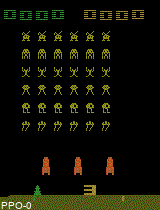

mean_reward=206.50 +/- 136.01562410252728


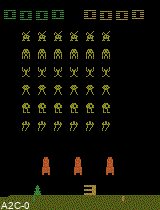

mean_reward=285.00 +/- 0.0


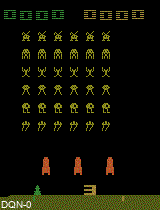

In [52]:
from stable_baselines3.common.evaluation import evaluate_policy

# Carrega e grava um vídeo por 100 episódios mas avalia por 10 (PPO) - 10 foi mto pouco pra ficar algo visível no gif
def evaluate(algo_class, episodes=100):
  env = gym.make(scenario)

  algo_name = algo_class.__name__
  trained_model = algo_class.load(f"models/{scenario}-{algo_name}", verbose=1)
  env = gym.make(scenario)

  frames = []
  obs = env.reset()
  for i in range(episodes):
      action, _states = trained_model.predict(obs, deterministic=True)
      obs, reward, done, info = env.step(action)
      
      # Para ver na tela
      #env.render()

      rgb_observation = env.render(mode = 'rgb_array') 
      frames.append(rgb_observation)

      if done:
        obs = env.reset()

  env.close()

  save_frames_as_gif(frames, 'images/', scenario, algo_name)

  # Avalia 10
  mean_reward, std_reward = evaluate_policy(trained_model, env, n_eval_episodes=10, deterministic=True)

  print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

evaluate(PPO)
evaluate(A2C)
evaluate(DQN)

### Comparando com o Zoo

In [2]:
# Baixando o código do Stable Baselines3 (recursive para baixar os modelos pré-treinados)
if not os.path.isdir('rl-baselines3-zoo'):
    !git clone --recursive https://github.com/DLR-RM/rl-baselines3-zoo.git

#Necessário para o baselines stables se rodar local (Mas optei por usar containers)
#!pip install -r ./requirements.txt

# Seta diretório raiz no baselines3 para as avaliações
%cd rl-baselines3-zoo

e:\temp\rl_exe1\rl-baselines3-zoo


In [3]:
#scenario = 'SpaceInvaders-v4'
trained_scenario = 'SpaceInvadersNoFrameskip-v4'

def evaluate(algo, eval_freq=1, eval_episodes=10, n_eval_envs=1):
    # Adicionei ao comando a parte pra converter o vídeo pra gif. Mais fácil de mostrar no notebook.
    command = f"cd /root/code/rl_zoo/ && python train.py --algo {algo} --env {scenario} --eval-freq {eval_freq} --eval-episodes {eval_episodes} --n-eval-envs {n_eval_envs} --tensorboard-log=tensorboard-logs -i rl-trained-agents/{algo}/{trained_scenario}_1/{trained_scenario}.zip"
    !docker run -t --rm --network host --ipc=host --mount src="%cd%",target=/root/code/rl_zoo,type=bind stablebaselines/rl-baselines3-zoo-cpu:latest bash -c "{command}"

evaluate("ppo")
#evaluate("a2c")
#evaluate("dqn")


+ export DISPLAY=:1
+ DISPLAY=:1
+ Xvfb :1 -screen 0 1024x768x24
+ display=1
+ file=/tmp/.X11-unix/X1
+ sleep 1
++ seq 1 10
+ for i in $(seq 1 10)
+ '[' -e /tmp/.X11-unix/X1 ']'
+ break
+ '[' -e /tmp/.X11-unix/X1 ']'
+ exec bash -c 'cd /root/code/rl_zoo/ && python train.py --algo ppo --env SpaceInvaders-v4 --eval-freq 1 --eval-episodes 10 --n-eval-envs 1 --tensorboard-log=tensorboard-logs -i rl-trained-agents/ppo/SpaceInvadersNoFrameskip-v4/SpaceInvadersNoFrameskip-v4.zip'
Traceback (most recent call last):
  File "train.py", line 145, in <module>
    ), "The trained_agent must be a valid path to a .zip file"
AssertionError: The trained_agent must be a valid path to a .zip file
+ export DISPLAY=:1
+ DISPLAY=:1
+ display=1
+ Xvfb :1 -screen 0 1024x768x24
+ file=/tmp/.X11-unix/X1
+ sleep 1
++ seq 1 10
+ for i in $(seq 1 10)
+ '[' -e /tmp/.X11-unix/X1 ']'
+ break
+ '[' -e /tmp/.X11-unix/X1 ']'
+ exec bash -c 'cd /root/code/rl_zoo/ && python train.py --algo a2c --env SpaceInvaders-v4 --eva

In [6]:
trained_scenario = scenario
command = f"cd /root/code/rl_zoo/ && python scripts/all_plots.py -a ppo a2c dqn --env {trained_scenario} -f rl-trained-agents/"
!docker run -t --rm --network host --ipc=host --mount src="%cd%",target=/root/code/rl_zoo,type=bind stablebaselines/rl-baselines3-zoo-cpu:latest bash -c "{command}"

^C
+ Xvfb :1 -screen 0 1024x768x24
+ export DISPLAY=:1
+ DISPLAY=:1
+ display=1
+ file=/tmp/.X11-unix/X1
+ sleep 1
++ seq 1 10
+ for i in $(seq 1 10)
+ '[' -e /tmp/.X11-unix/X1 ']'
+ break
+ '[' -e /tmp/.X11-unix/X1 ']'
+ exec bash -c 'cd /root/code/rl_zoo/ && python scripts/all_plots.py -a ppo a2c dqn --env SpaceInvaders-v4 -f rl-trained-agents/'
No handles with labels found to put in legend.
# results_table
|  Environments  |       PPO        |       A2C        |       DQN        |
|----------------|------------------|------------------|------------------|
|                |rl-trained-agents/|rl-trained-agents/|rl-trained-agents/|
|SpaceInvaders-v4|0.0 +/- 0.0       |0.0 +/- 0.0       |0.0 +/- 0.0       |


In [50]:
from shutil import copyfile

def record_video(algo, steps=1000):
    # Não funcionou chamando o script do repo... pq no windows não respeita comandos bash por algum motivo. Fallback pro que o script faz com o docker.
    #!./scripts/run_docker_cpu.sh python train.py --algo a2c --env SpaceInvaders-v4
    fname = f'final-model-{algo}-SpaceInvadersNoFrameskip-v4-step-0-to-step-1000'
    path = f"rl-trained-agents/{algo}/SpaceInvadersNoFrameskip-v4_1/videos/{fname}"
    # Adicionei ao comando a parte pra converter o vídeo pra gif. Mais fácil de mostrar no notebook.
    command = f"cd /root/code/rl_zoo/ && python -m utils.record_video --algo {algo} --env SpaceInvadersNoFrameskip-v4 -n {steps} " \
        f"&& ffmpeg -i {path}.mp4 -vf fps=10 {path}.gif -hide_banner -loglevel error"
    !docker run -t --rm --network host --ipc=host --mount src="%cd%",target=/root/code/rl_zoo,type=bind stablebaselines/rl-baselines3-zoo-cpu:latest bash -c "{command}"

    copyfile(f'{path}.gif', f'../images/{fname}.gif')

record_video("ppo")
record_video("a2c")
record_video("dqn")


+ export DISPLAY=:1
+ DISPLAY=:1
+ display=1
+ Xvfb :1 -screen 0 1024x768x24
+ file=/tmp/.X11-unix/X1
+ sleep 1
++ seq 1 10
+ for i in $(seq 1 10)
+ '[' -e /tmp/.X11-unix/X1 ']'
+ break
+ '[' -e /tmp/.X11-unix/X1 ']'
+ exec bash -c 'cd /root/code/rl_zoo/ && python -m utils.record_video --algo ppo --env SpaceInvadersNoFrameskip-v4 -n 1000 && ffmpeg -i rl-trained-agents/ppo/SpaceInvadersNoFrameskip-v4_1/videos/final-model-ppo-SpaceInvadersNoFrameskip-v4-step-0-to-step-1000.mp4 -vf fps=10 rl-trained-agents/ppo/SpaceInvadersNoFrameskip-v4_1/videos/final-model-ppo-SpaceInvadersNoFrameskip-v4-step-0-to-step-1000.gif -hide_banner -loglevel error'
Loading latest experiment, id=1
Stacking 4 frames
Wrapping the env in a VecTransposeImage.
Saving video to /root/code/rl_zoo/rl-trained-agents/ppo/SpaceInvadersNoFrameskip-v4_1/videos/final-model-ppo-SpaceInvadersNoFrameskip-v4-step-0-to-step-1000.mp4
^C
^C


### PPO - RL Baselines 3 Zoo:
![PPO - RL Baselines 3 Zoo](images/final-model-ppo-SpaceInvadersNoFrameskip-v4-step-0-to-step-1000.gif)

### A2C - RL Baselines 3 Zoo:
![A2C - RL Baselines 3 Zoo](images/final-model-a2c-SpaceInvadersNoFrameskip-v4-step-0-to-step-1000.gif)

### DQN - RL Baselines 3 Zoo:
![DQN - RL Baselines 3 Zoo](images/final-model-dqn-SpaceInvadersNoFrameskip-v4-step-0-to-step-1000.gif)


In [32]:
def run_script(algo, eval_freq=10000, eval_episodes=10, eval_envs=1):
    # Não funcionou chamando o script do repo... pq no windows não respeita comandos bash por algum motivo. Fallback pro que o script faz com o docker.
    #!./scripts/run_docker_cpu.sh python train.py --algo a2c --env SpaceInvaders-v4
    !docker run -t --rm --network host --ipc=host --mount src="%cd%",target=/root/code/rl_zoo,type=bind stablebaselines/rl-baselines3-zoo-cpu:latest bash -c "cd /root/code/rl_zoo/ && python train.py --algo {algo} --env SpaceInvaders-v4 --tensorboard-log=tensorboard-logs --eval-freq {eval_freq} --eval-episodes {eval_episodes} --n-eval-envs {eval_envs}"

run_script("a2c", eval_freq=500)

^C


In [33]:
# Treinando PPO
#!docker run -t --rm --network host --ipc=host --mount src="%cd%",target=/root/code/rl_zoo,type=bind stablebaselines/rl-baselines3-zoo-cpu:latest bash -c "cd /root/code/rl_zoo/ && python train.py --algo ppo --env SpaceInvaders-v4"
run_script("ppo")

In [ ]:
# Treinando DQN
#!docker run -t --rm --network host --ipc=host --mount src="%cd%",target=/root/code/rl_zoo,type=bind stablebaselines/rl-baselines3-zoo-cpu:latest bash -c "cd /root/code/rl_zoo/ && python train.py --algo dqn --env SpaceInvaders-v4"
run_script("dqn")
